# Lab 7

**Name : Sneha Gupta <br>
RegNo: 21112341 <br>
Class: 4BScEA** 
****

### **Problem Statement:** <br>
1. For the given dataset apply KMeans clustering technique to label the dataset and predict the quality of redwine using any of the supervised learning techniques.
2. For the given dataset apply Agglomerative Clustering technique to label the dataset and predict the quality of redwine using the supervised learning technique applied in Q(1).
3. Apply PCA and reduce the features to 2 dimensions and visualize the clusters and centroids for each cluster.

### **Methodology:** <br>
* Import excel file
* Apply K-Means clustering
* Apply hierarchial clustering
* Apply KNN
* Check accuracy using both the clusters
* Apply PCA on the cluster with highest accuracy.

### **Observation:** <br>
The accuracy with hierarchial clustering technique is more than k means clustering

### **Learnings:** <br>
* Leant how to apply K-Means clustering
* Leant how to apply hierarchial clustering
* Learnt how to apply self supervised learning

| Question Number | Status |
| --- | --- |
| 1 | Completed |
| 2 | Completed |
| 3 | Completed |

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from numpy import cov
from numpy.linalg import eig
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\winequality-red.csv",index_col=False)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\winequality-red-un.csv",index_col=False)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### `K-Means Clustering`

In [4]:
sse = []

for i in range (1,11):
    km = KMeans (n_clusters = i)
    km.fit_predict(df1)
    sse.append(km.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [5]:
sse

[1914079.627804372,
 691909.8671253549,
 395309.1834556359,
 283160.6091505177,
 221227.28445279846,
 177329.61632259516,
 149836.69395254608,
 132804.02466366888,
 116520.80145214799,
 101670.23749962085]

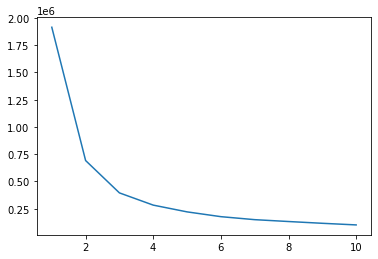

In [6]:
plt.plot(range(1,11),sse)

In [7]:
km = KMeans(n_clusters = 2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=42 )
y = km.fit_predict(df1)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [8]:
km.labels_

array([0, 1, 0, ..., 0, 0, 0])

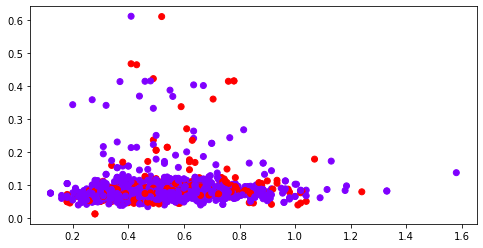

In [9]:
plt.figure(figsize=(8,4))
plt.scatter(df1['volatile acidity'],df1['chlorides'],c=km.labels_,cmap='rainbow')

In [10]:
# compute an average silhouette score for each point

silhouette_score_average = silhouette_score(df1, km.predict(df1))

# lets see what that score it
print(silhouette_score_average)

0.6034220347331056


In [11]:
silhouette_score_individual = silhouette_samples(df1, km.predict(df1))

# iterate through to find any negative values
for each_value in silhouette_score_individual:
    if each_value < 0:
        print(f'We have found a negative silhouette score: {each_value}')

We have found a negative silhouette score: -0.001315337029171721
We have found a negative silhouette score: -0.04916659425076044
We have found a negative silhouette score: -0.037890157826638515
We have found a negative silhouette score: -0.012282221152467637
We have found a negative silhouette score: -0.038623023603192044
We have found a negative silhouette score: -0.018990213330747154
We have found a negative silhouette score: -0.017454797220853403
We have found a negative silhouette score: -0.03248044136129399
We have found a negative silhouette score: -0.03851398126533041
We have found a negative silhouette score: -0.03851398126533041
We have found a negative silhouette score: -0.04515579700484628


In [12]:
# Assigning the predicted values to the dataset
df1['target']=km.labels_

In [13]:
x=df1.iloc[:,:-1]
y=df1['target']

In [14]:
model=LogisticRegression()
model.fit(x,y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
df_x=df.iloc[:,:-1]
df_y=df['quality']

In [16]:
model.score(df_x,df_y)

0.0

In [17]:
y_pred=model.predict(df_x)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [18]:
confusion_matrix(df_y,y_pred)

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0,   0,   0,   0],
       [ 42,  11,   0,   0,   0,   0,   0,   0],
       [419, 262,   0,   0,   0,   0,   0,   0],
       [514, 124,   0,   0,   0,   0,   0,   0],
       [179,  20,   0,   0,   0,   0,   0,   0],
       [ 15,   3,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [19]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


### `Agglomerative Clustering`

In [20]:
df2 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\winequality-red-un.csv",index_col=False)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


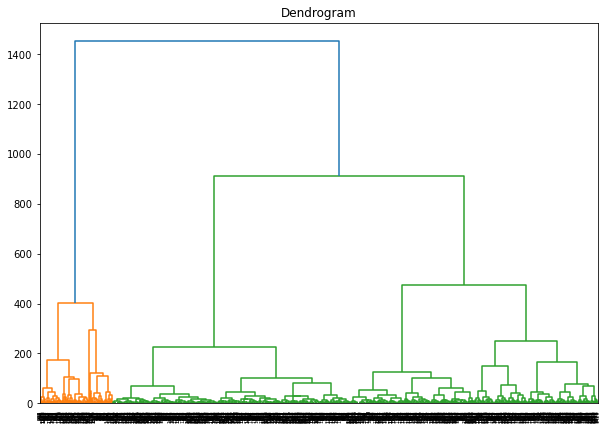

In [21]:
#single, complete, average, centroid

plt.figure(figsize = (10,7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(df2,method='ward'))
# ward means centroid

In [22]:
cluster = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'complete')
labels = cluster.fit_predict(df2)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


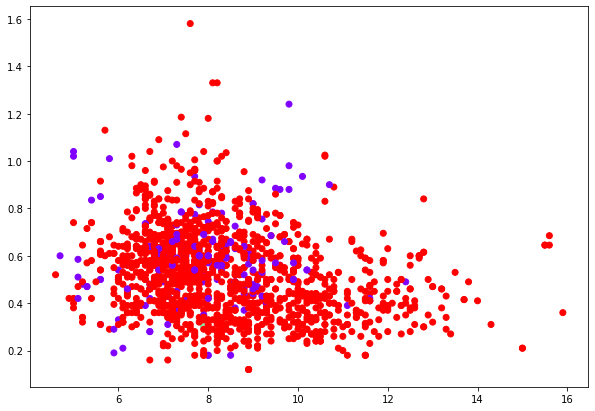

In [23]:
plt.figure(figsize = (10,7))
plt.scatter(df['fixed acidity'],df['volatile acidity'],c = cluster.labels_,cmap='rainbow')

In [24]:
# compute an average silhouette score for each point
silhouette_score_average = silhouette_score(df2, cluster.fit_predict(df2))
# lets see what that score it
print(silhouette_score_average)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.5946341777649405


In [25]:
cluster1=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels=cluster1.fit_predict(df2)

cluster2=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels=cluster2.fit_predict(df2)

cluster3=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels=cluster3.fit_predict(df2)

cluster4=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels=cluster4.fit_predict(df2)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
silhouette_scores = []
silhouette_scores.append(silhouette_score(df2, cluster1.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster2.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster3.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster4.fit_predict(df2)))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


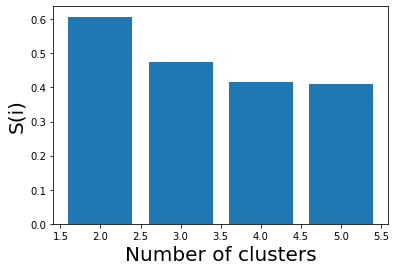

In [27]:
# Plotting a bar graph to compare the results
k = [2, 3, 4, 5]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [28]:
cluster1=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
labels=cluster1.fit_predict(df2)

cluster2=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels=cluster2.fit_predict(df2)

cluster3=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels=cluster3.fit_predict(df2)

cluster4=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
labels=cluster4.fit_predict(df2)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
silhouette_scores = []
silhouette_scores.append(silhouette_score(df2, cluster1.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster2.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster3.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster4.fit_predict(df2)))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


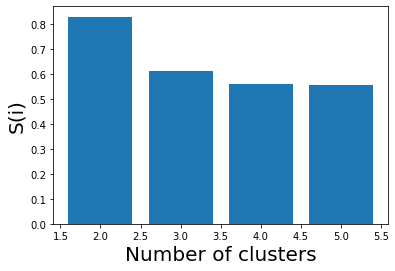

In [30]:
# Plotting a bar graph to compare the results
k = [2, 3, 4, 5]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [31]:
cluster1=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels=cluster1.fit_predict(df2)

cluster2=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels=cluster2.fit_predict(df2)

cluster3=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
labels=cluster3.fit_predict(df2)

cluster4=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
labels=cluster4.fit_predict(df2)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [32]:
silhouette_scores = []
silhouette_scores.append(silhouette_score(df2, cluster1.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster2.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster3.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster4.fit_predict(df2)))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


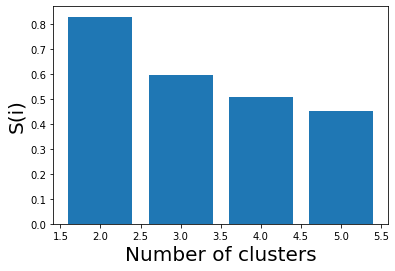

In [33]:
# Plotting a bar graph to compare the results
k = [2, 3, 4, 5]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [34]:
cluster1=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
labels=cluster1.fit_predict(df2)

cluster2=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels=cluster2.fit_predict(df2)

cluster3=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
labels=cluster3.fit_predict(df2)

cluster4=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
labels=cluster4.fit_predict(df2)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [35]:
silhouette_scores = []
silhouette_scores.append(silhouette_score(df2, cluster1.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster2.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster3.fit_predict(df2)))
silhouette_scores.append(silhouette_score(df2, cluster4.fit_predict(df2)))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


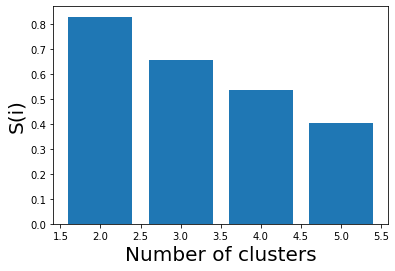

In [36]:
# Plotting a bar graph to compare the results
k = [2, 3, 4, 5]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [37]:
df2['label']=cluster.labels_

In [38]:
x=df2.iloc[:,:-1]
y=df2['label']

In [39]:
model=LogisticRegression()
model.fit(x,y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
df_x=df.iloc[:,:-1]
df_y=df['quality']

In [41]:
model.score(df_x,df_y)

0.0

In [42]:
y_pred=model.predict(df_x)

In [43]:
confusion_matrix(df_y,y_pred)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  10,   0,   0,   0,   0,   0,   0],
       [  2,   0,  51,   0,   0,   0,   0,   0,   0],
       [134,   0, 547,   0,   0,   0,   0,   0,   0],
       [ 32,   0, 606,   0,   0,   0,   0,   0,   0],
       [  8,   2, 189,   0,   0,   0,   0,   0,   0],
       [  2,   0,  16,   0,   0,   0,   0,   0,   0]], dtype=int64)

### `PCA`

In [45]:
# Compute the covariance matrix
covariance_matrix = cov(x.T)

In [47]:
# Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = eig(covariance_matrix)

In [48]:
# Sort the eigenvalues in descending order and the corresponding eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [53]:
# Select the number of principal components
n_components = 2

# Project the data onto the principal components
X_pca = x.dot(eigenvectors[:,:n_components])

In [54]:
X_pca

,0,1
0,-35.491241,3.276338
1,-70.753870,9.708559
2,-55.878820,2.798777
3,-62.146209,3.349116
4,-35.491241,3.276338
...,...,...
1594,-49.845257,21.613340
1595,-58.206131,26.927762
1596,-45.284793,19.571481
1597,-49.849025,21.616405


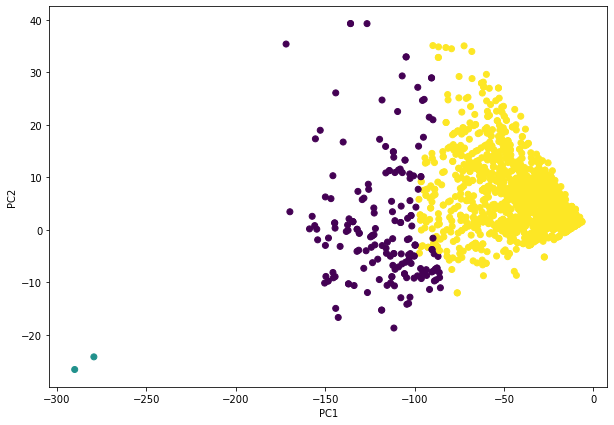

In [55]:
plt.figure(figsize = (10,7))
plt.scatter(X_pca.iloc[:,0],X_pca.iloc[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()